In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/Day 19_E-Commerce_Data.csv"
df = pd.read_csv(file_path)
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
500,46,Home Decor,2965.0,41.0,4.0,Not as expected,2023-02-15
501,109,Home Decor,384.0,56.0,1.0,Excellent product!,2023-04-19
502,52,Electronics,2434.0,26.0,3.0,Value for money,2023-02-21
503,281,Home Decor,3093.0,24.0,3.0,NaN,2023-10-08


In [3]:
missing_counts = df.isna().sum()
missing_percentage = (missing_counts / len(df)) * 100
print(pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percentage}))

                  Missing Values  Percentage
Order_ID                       0    0.000000
Product_Category              24    4.752475
Product_Price                 20    3.960396
Customer_Age                  15    2.970297
Rating                        25    4.950495
Review_Text                   21    4.158416
Order_Date                    10    1.980198


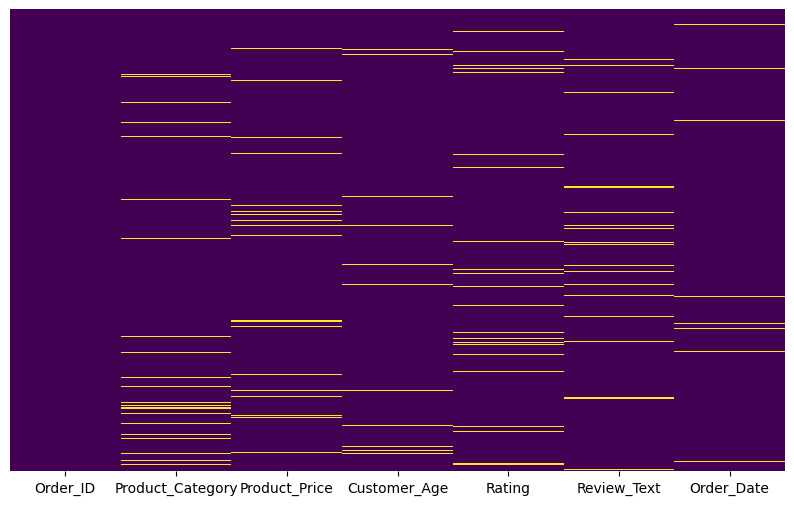

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [5]:
df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)
df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)
df['Order_Date'].fillna(method='ffill', inplace=True)
df

<ipython-input-5-97e7c1208863>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)
<ipython-input-5-97e7c1208863>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
500,46,Home Decor,2965.0,41.0,4.0,Not as expected,2023-02-15
501,109,Home Decor,384.0,56.0,1.0,Excellent product!,2023-04-19
502,52,Electronics,2434.0,26.0,3.0,Value for money,2023-02-21
503,281,Home Decor,3093.0,24.0,3.0,NaN,2023-10-08


In [6]:
from sklearn.impute import KNNImputer
import numpy as np

knn_imputer = KNNImputer(n_neighbors=5)
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1.0,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2.0,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3.0,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4.0,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5.0,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
500,46.0,Home Decor,2965.0,41.0,4.0,Not as expected,2023-02-15
501,109.0,Home Decor,384.0,56.0,1.0,Excellent product!,2023-04-19
502,52.0,Electronics,2434.0,26.0,3.0,Value for money,2023-02-21
503,281.0,Home Decor,3093.0,24.0,3.0,NaN,2023-10-08


In [7]:
before_imputation = df.describe()
after_imputation = df.describe()
print("Summary Statistics Before and After Imputation:")
print(before_imputation, after_imputation)


Summary Statistics Before and After Imputation:
         Order_ID  Product_Price  Customer_Age      Rating
count  505.000000     505.000000    505.000000  505.000000
mean   249.899010    2442.748515     42.194455    3.202772
std    144.769438    1387.499472     14.721617    1.122317
min      1.000000     108.000000     18.000000    1.000000
25%    124.000000    1292.000000     30.000000    2.400000
50%    250.000000    2464.000000     41.000000    3.000000
75%    375.000000    3588.000000     54.000000    4.000000
max    500.000000    4993.000000     69.000000    5.000000          Order_ID  Product_Price  Customer_Age      Rating
count  505.000000     505.000000    505.000000  505.000000
mean   249.899010    2442.748515     42.194455    3.202772
std    144.769438    1387.499472     14.721617    1.122317
min      1.000000     108.000000     18.000000    1.000000
25%    124.000000    1292.000000     30.000000    2.400000
50%    250.000000    2464.000000     41.000000    3.000000
75%    3

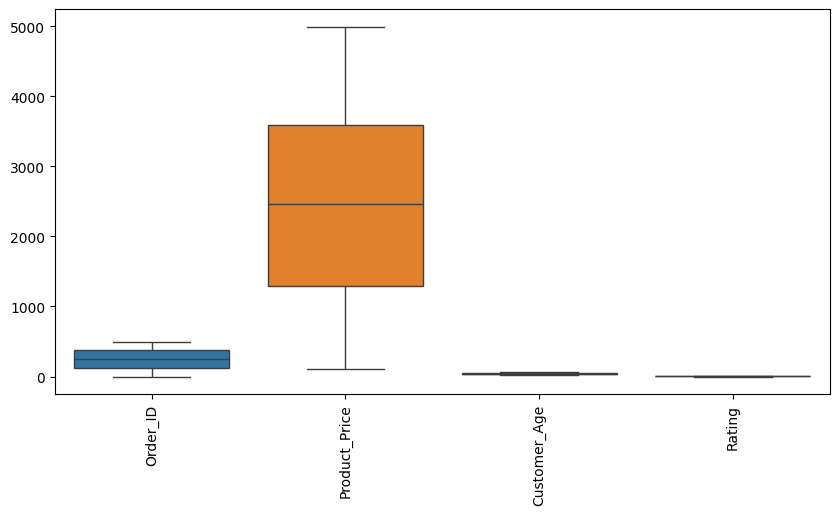

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.show()

In [9]:
cleaned_file_path = "/content/drive/MyDrive/Cleaned_E-Commerce_Data.csv"
df.to_csv(cleaned_file_path, index=False)